# Importing modules and appending paths

In [1]:
### imports

# external modules
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../utils/'))
# add the paths to import local modules



# local modules
import get_oms_data
# importlib.reload(get_oms_data)  # not needed unless making live changes to the modules
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

import json_utils as jsonu
import plot_utils as pu

In [2]:
import mplhep as hep
# import matplotlib as matplot
# matplot.style.use(hep.style.cms)
plt.style.use(hep.style.ROOT)

# Very important to initialize the API


In [3]:
# get the omsapi instance
omsapi = get_oms_api()

## Getting All runs in different eras 2018

In [4]:
def has_fill(df):
    """
    Input: dataframe
    
    Returns: dataframe 
    
    This function returns a dataframe where only entries that have a non-null "fill_number" attribute are kept.
    """
    dfcopy=df[df.fill_number.isna() == False].copy()
    return dfcopy

def add_loc_wrt_fill(df):
    import numpy as np
    dfcopy= df.copy()
    dfcopy["Fill location"] = np.empty(len(dfcopy))
    temp=dfcopy.groupby("fill_number")["run_number"].transform('count')    
    x=1
    for count,i in enumerate(temp):
        if x==i :
            dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
            x=1
            continue
        dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
        x+=1
        
    return dfcopy


# def add_loc_wrt_run(df):
#     import numpy as np
#     dfcopy= df.copy()
#     dfcopy["Run location"] = np.empty(len(dfcopy))
#     temp=dfcopy.groupby("run_number")["run_number"].transform('count')    
#     x=1
#     for count,i in enumerate(temp):
#         if x==i :
#             dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
#             x=1
#             continue
#         dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
#         x+=1
        
#     return dfcopy


def makeDF(json):
    datadict=json['data'][0]['attributes']
    keys=datadict.keys()
    
    datasetlist=[]
    
    for i in range(len(json['data'])):
        values=json['data'][i]['attributes'].values()
        datasetlist.append(values)
    return pd.DataFrame(datasetlist,columns=keys)#\
#     .set_index(['fill_number','run_number'])\
#     .sort_index()

def convert_check_addFillLoc(json):
    """
    Expects a json from the run_number query
    
    """
    df=makeDF(json)
    #now filter out runs that don't  have fill number
    df=has_fill(df)
    #now add run location wrt fill
    DF_withloc=add_loc_wrt_fill(df)
    return DF_withloc


# def convert_check_addRunLoc(json):
#     """
#     Expects a json from the Lumisection query
    
#     """
#     df=makeDF(json)
#     #now filter out runs that don't  have fill number
#     df=has_fill(df)
#     #now add run location wrt fill
#     DF_withloc=add_loc_wrt_fill(df)
#     return DF_withloc


Here are options for the run attributes
```python
['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field','tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update', 'beamactive_total_deadtime','recorded_lumi', 'delivered_lumi', 'cmssw_version',
'crossing_angle_stop', 'energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'crossing_angle_start', 'fill_type_party2','fill_type_party1', 'beta_star_start', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'clock_type', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam', 'beta_star_stop','hlt_physics_counter']
       
```

In [5]:
# example: get run information for a single run

runnb = (315190,315260) # 2018A
attributes=['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update','recorded_lumi', 'delivered_lumi','energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'fill_type_party2','fill_type_party1', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam','hlt_physics_counter']
run_info = get_oms_data( omsapi, 'runs', runnb ,limit_entries=5_000,attributes=attributes)
# print(run_info)

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=fill_type_runtime,hlt_physics_rate,end_time,hlt_key,start_time,l1_hlt_mode,recorded_lumi,fill_number,trigger_mode,initial_prescale_index,run_number,l1_rate,l1_menu,l1_key,end_lumi,hlt_physics_throughput,fill_type_party1,fill_type_party2,delivered_lumi,sequence,l1_key_stripped,last_lumisection_number,l1_triggers_counter,duration,l1_hlt_mode_stripped,energy,components,init_lumi,last_update,stable_beam,hlt_physics_size,hlt_physics_counter&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=5000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=fill_type_runtime,hlt_physics_rate,end_time,hlt_key,start_time,l1_hlt_mode,recorded_lumi,fill_number,trigger_mode,initial_prescale_index,run_number,l1_rate,l1_menu,l1_key,end_lumi,hlt_physics_throughput,fill_type_party1,fill_type_party2,delivered_lumi,sequence,l1_key_stripped,last_lumisection_number,l1_triggers_counter,duration,l1_hlt_mode_stripped,energy,components

In [9]:
rundf=makeDF(run_info)
print(rundf.shape)
rundf[["run_number",'fill_number','last_lumisection_number',"l1_key"]]


(54, 32)


,run_number,fill_number,last_lumisection_number,l1_key
0,315190,6614.0,115.0,l1_trg_collisions2018/v9
1,315193,6615.0,27.0,l1_trg_cosmics2018/v62
2,315194,6615.0,149.0,l1_trg_cosmics2018/v62
3,315195,NaN,NaN,None
4,315196,NaN,NaN,None
5,315197,NaN,NaN,None
6,315198,NaN,NaN,None
7,315199,NaN,NaN,None
8,315201,6615.0,7.0,l1_trg_cosmics2018/v62
9,315205,6615.0,6.0,l1_trg_collisions2018/v9


In [10]:
rundf=has_fill(rundf)
rundf.shape

(44, 32)

In [43]:
rundf=convert_check_addFillLoc(run_info)
rundf.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(44, 33)

In [44]:
rundf[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_key"]]

,run_number,fill_number,Fill location,last_lumisection_number,l1_key
0,315190,6614.0,(1/1),115.0,l1_trg_collisions2018/v9
1,315193,6615.0,(1/42),27.0,l1_trg_cosmics2018/v62
2,315194,6615.0,(2/42),149.0,l1_trg_cosmics2018/v62
8,315201,6615.0,(3/42),7.0,l1_trg_cosmics2018/v62
9,315205,6615.0,(4/42),6.0,l1_trg_collisions2018/v9
10,315206,6615.0,(5/42),79.0,l1_trg_cosmics2018/v62
12,315210,6615.0,(6/42),106.0,l1_trg_cosmics2018/v62
13,315214,6615.0,(7/42),2.0,l1_trg_cosmics2018/v63
14,315215,6615.0,(8/42),9.0,l1_trg_circulating2018/v18
15,315216,6615.0,(9/42),67.0,l1_trg_circulating2018/v18


In [45]:
rundf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 53
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   components               44 non-null     object 
 1   l1_hlt_mode_stripped     44 non-null     object 
 2   l1_key                   44 non-null     object 
 3   duration                 44 non-null     int64  
 4   l1_triggers_counter      41 non-null     float64
 5   hlt_physics_throughput   36 non-null     float64
 6   init_lumi                44 non-null     float64
 7   last_update              44 non-null     object 
 8   recorded_lumi            44 non-null     float64
 9   delivered_lumi           44 non-null     float64
 10  energy                   44 non-null     float64
 11  end_lumi                 44 non-null     float64
 12  hlt_physics_rate         36 non-null     float64
 13  fill_number              44 non-null     float64
 14  l1_hlt_mode              44 

Letting Pandas automatically convert the dtypes is optional

In [46]:
rundf_coll=rundf[rundf['l1_key'].str.contains("collisions")]

In [48]:
rundf_coll[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_key"]]
# to save this dataframe in a csv uncomment below:
# rundf_coll.to_csv("CollisionRuns.csv",index=False)

,run_number,fill_number,Fill location,last_lumisection_number,l1_key
0,315190,6614.0,(1/1),115.0,l1_trg_collisions2018/v9
9,315205,6615.0,(4/42),6.0,l1_trg_collisions2018/v9
19,315225,6615.0,(13/42),29.0,l1_trg_collisions2018/v11
23,315229,6615.0,(17/42),24.0,l1_trg_collisions2018/v10
34,315240,6615.0,(28/42),6.0,l1_trg_collisions2018/v10
35,315241,6615.0,(29/42),NaN,l1_trg_collisions2018/v11
36,315242,6615.0,(30/42),60.0,l1_trg_collisions2018/v11
37,315243,6615.0,(31/42),48.0,l1_trg_collisions2018/v11
38,315244,6615.0,(32/42),42.0,l1_trg_collisions2018/v11
40,315246,6615.0,(33/42),25.0,l1_trg_collisions2018/v11


Saving the Run queries to a csv **(this is mostly to not oversaturate the API)**

## Lumisections Queries 

In [64]:
# # get the omsapi instance

# omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,315260) # 2018A
attributes = ['fill_number',"run_number",'lumisection_number',"physics_flag","cms_active",
              'pileup','delivered_lumi','recorded_lumi',"init_lumi",'end_lumi',
              'beam1_stable','beam2_stable','beam2_present','beam1_present']
ls_info = get_oms_data( omsapi, 'lumisections', runnb ,limit_entries=100_000,attributes=attributes)


Unauthorized. Will try to obtain a new token
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=lumisection_number,cms_active,init_lumi,beam1_present,delivered_lumi,fill_number,beam1_stable,beam2_stable,run_number,beam2_present,recorded_lumi,end_lumi,physics_flag,pileup&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=100000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=lumisection_number,cms_active,init_lumi,beam1_present,delivered_lumi,fill_number,beam1_stable,beam2_stable,run_number,beam2_present,recorded_lumi,end_lumi,physics_flag,pileup&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=100000


In [65]:
ls_df=convert_check_addFillLoc(ls_info)
ls_df.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(2718, 15)

In [51]:
ls

2018AEra_runs.csv         Runs_315190-315286_LS.csv  Runs_315190-316766_LS.csv
Guillermo OMS work.ipynb  Runs_315190-316287_LS.csv


### You could also use the CSV files available in my local project.
`Runs_315190-316766_LS.csv` has the majority of Era 2018A


In [53]:
# ls_df=pd.read_csv("Runs_315190-316766_LS.csv")

In [66]:
ls_df.isna().sum()

fill_number           0
beam1_present         0
physics_flag          0
lumisection_number    0
cms_active            0
beam1_stable          0
init_lumi             0
pileup                0
run_number            0
recorded_lumi         0
delivered_lumi        0
beam2_stable          0
end_lumi              0
beam2_present         0
Fill location         0
dtype: int64

In [67]:
ls_df.nunique()

fill_number              3
beam1_present            2
physics_flag             2
lumisection_number     213
cms_active               2
beam1_stable             2
init_lumi             1107
pileup                1137
run_number              41
recorded_lumi          737
delivered_lumi         905
beam2_stable             2
end_lumi              1106
beam2_present            2
Fill location         2718
dtype: int64

In [68]:
ls_df.tail(10)

,fill_number,beam1_present,physics_flag,lumisection_number,cms_active,beam1_stable,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
2708,6616,False,False,104,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(124/133)
2709,6616,False,False,105,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(125/133)
2710,6616,False,False,106,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(126/133)
2711,6616,False,False,107,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(127/133)
2712,6616,False,False,108,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(128/133)
2713,6616,False,False,109,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(129/133)
2714,6616,False,False,110,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(130/133)
2715,6616,False,False,111,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(131/133)
2716,6616,False,False,112,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(132/133)
2717,6616,False,False,113,False,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(133/133)


Last lumisection number for run 315190 was 115.0 on the Run dataframe.
Here we find out that it's due to CMS not being active after that LS

In [69]:
ls_df.loc[110:120]#[['lumisection_number',"physics_flag","cms_active",'pileup','delivered_lumi','recorded_lumi']]

,fill_number,beam1_present,physics_flag,lumisection_number,cms_active,beam1_stable,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
110,6614,False,True,111,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(111/121)
111,6614,False,True,112,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(112/121)
112,6614,False,True,113,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(113/121)
113,6614,False,True,114,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(114/121)
114,6614,False,True,115,True,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(115/121)
115,6614,False,True,116,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(116/121)
116,6614,False,True,117,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(117/121)
117,6614,False,True,118,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(118/121)
118,6614,False,True,119,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(119/121)
119,6614,False,True,120,False,False,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(120/121)


### Getting the lumisections of collision runs only

In [126]:
# ls_df.run_number.unique().tolist()
rundf_coll.run_number.tolist(),len(rundf_coll.run_number.tolist())
for i,run in enumerate(rundf_coll.run_number.tolist()):
    print(i,run)
    

0 315190
1 315205
2 315225
3 315229
4 315240
5 315241
6 315242
7 315243
8 315244
9 315246
10 315247
11 315248
12 315249
13 315250
14 315252
15 315255
16 315257
17 315258
18 315259


In [120]:
temp=[i for i in rundf_coll.run_number.tolist() if i in ls_df.run_number.unique().tolist()]
print(temp,len(temp))

[315190, 315205, 315225, 315229, 315240, 315242, 315243, 315244, 315246, 315247, 315248, 315249, 315250, 315252, 315255, 315257, 315258, 315259] 18


In [127]:
lsdf_collisions=ls_df.set_index("run_number").loc[[i for i in rundf_coll.run_number.tolist() if i in ls_df.run_number.unique().tolist()]].reset_index()

In [128]:
lsdf_collisions

,run_number,fill_number,beam1_present,physics_flag,lumisection_number,cms_active,beam1_stable,init_lumi,pileup,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
0,315190,6614,True,True,1,True,True,0.363444,43.896393,67.803109,74.081656,True,0.363079,True,(1/121)
1,315190,6614,True,True,2,True,True,0.363079,43.852333,67.884234,74.166281,True,0.362664,True,(2/121)
2,315190,6614,True,True,3,True,True,0.362664,43.802155,67.965141,74.250797,True,0.362341,True,(3/121)
3,315190,6614,True,True,4,True,True,0.362341,43.763168,68.019445,74.335195,True,0.362100,True,(4/121)
4,315190,6614,True,True,5,True,True,0.362100,43.734123,68.100352,74.419586,True,0.362182,True,(5/121)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,315259,6616,False,True,209,False,False,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,(16/133)
1099,315259,6616,False,True,210,False,False,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,(17/133)
1100,315259,6616,False,True,211,False,False,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,(18/133)
1101,315259,6616,False,True,212,False,False,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,(19/133)


## Lets plot the lumi level info

<AxesSubplot:xlabel='run_number'>

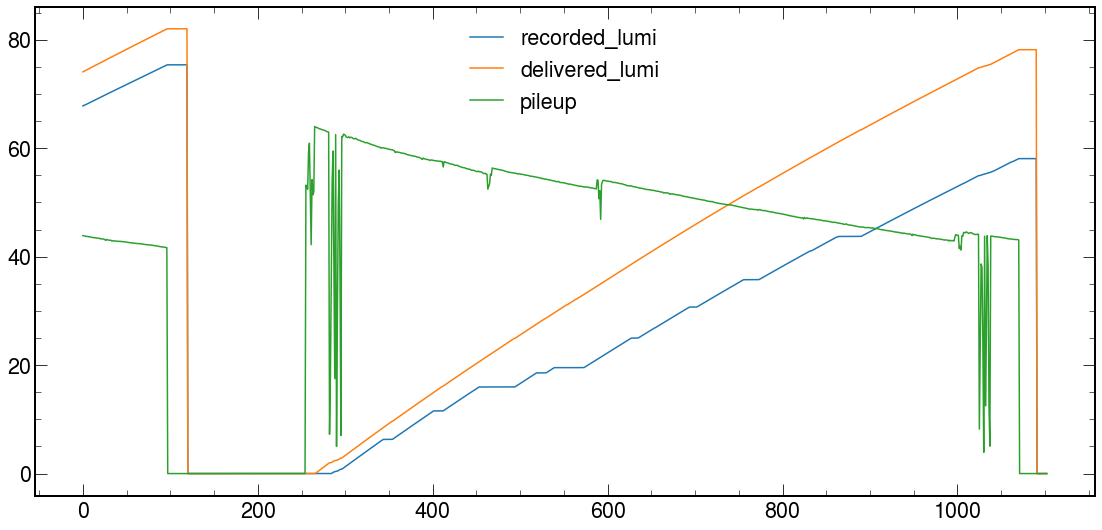

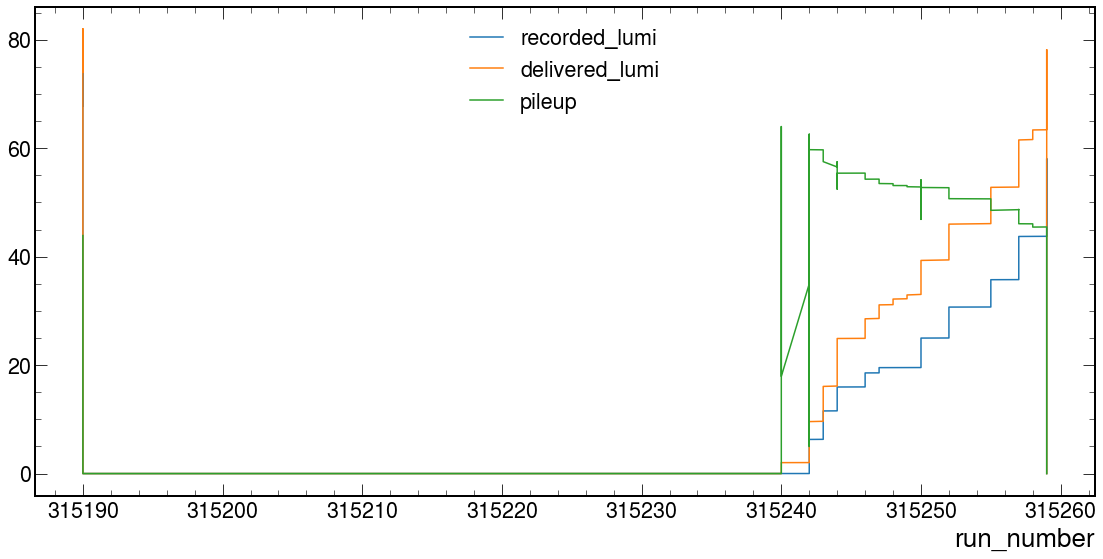

In [177]:
lsdf_collisions.plot(y=['recorded_lumi','delivered_lumi','pileup'],figsize=(19,9),logy=False,logx=False.)
lsdf_collisions.plot(y=['recorded_lumi','delivered_lumi','pileup'],x="run_number",figsize=(19,9),logy=False,logx=False)
# lsdf_collisions.plot(y=['init_lumi','end_lumi'],x='run_number' ,figsize=(19,9),logy=False,logx=False)

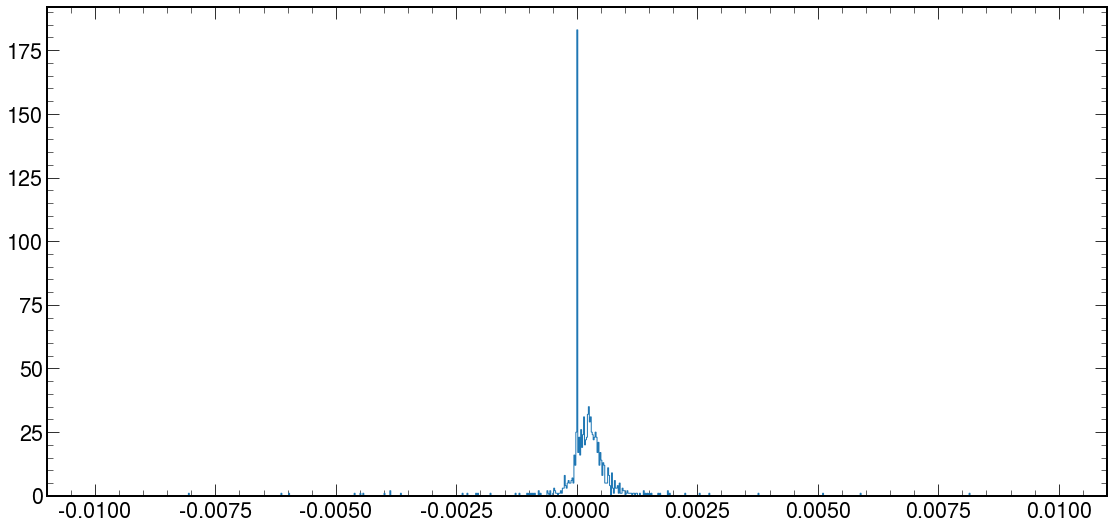

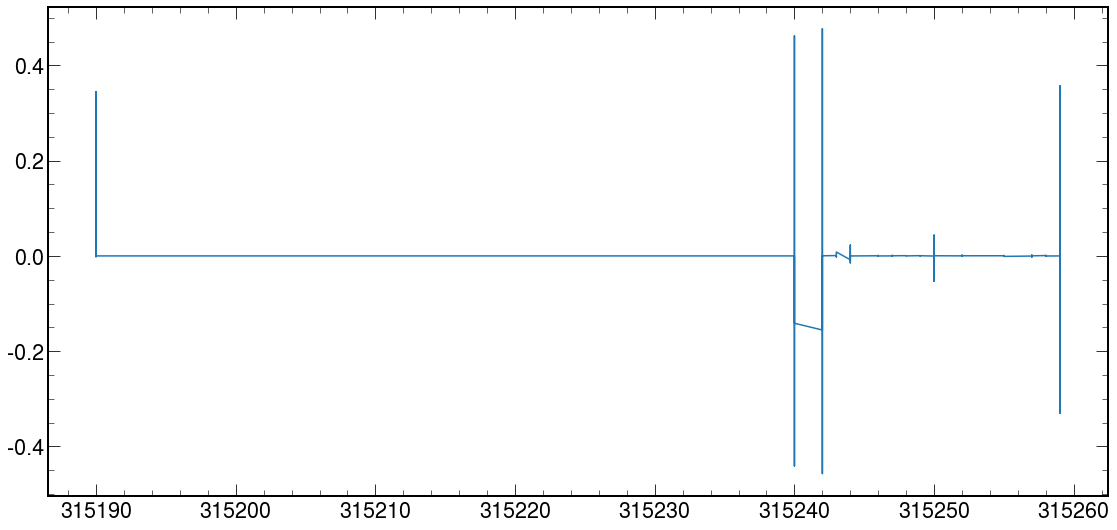

In [176]:
lumidelta=lsdf_collisions['init_lumi'] -lsdf_collisions['end_lumi']
plt.figure(figsize=(19,9))
plt.hist(lumidelta,bins=1000,range=(-.01,.01),histtype="step");
plt.show()
plt.figure(figsize=(19,9))
plt.plot(lsdf_collisions.run_number,lumidelta);
plt.show()

## It is useful to join the different dataframes into one dictionary for easier access

In [217]:
Df_dict={}
Df_dict['runs']= pd.read_csv("2018AEra_runs.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-316766_LS.csv")

In [85]:
Df_dict['runs']['run_number'].unique()

array([315190, 315193, 315194, 315201, 315205, 315206, 315210, 315214,
       315215, 315216, 315218, 315220, 315224, 315225, 315226, 315227,
       315228, 315229, 315230, 315231, 315232, 315233, 315234, 315235,
       315236, 315237, 315238, 315239, 315240, 315241, 315242, 315243,
       315244, 315246, 315247, 315248, 315249, 315250, 315252, 315255,
       315257, 315258, 315259, 315260, 315262, 315264, 315265, 315266,
       315267, 315268, 315270, 315273, 315274, 315275, 315286, 315293,
       315297, 315299, 315300, 315304, 315309, 315313, 315315, 315318,
       315320, 315321, 315322, 315331, 315332, 315333, 315334, 315335,
       315338, 315339, 315341, 315342, 315343, 315344, 315345, 315346,
       315349, 315350, 315351, 315353, 315354, 315355, 315357, 315358,
       315359, 315360, 315361, 315362, 315363, 315365, 315366, 315373,
       315376, 315382, 315385, 315390, 315398, 315400, 315401, 315402,
       315403, 315404, 315405, 315406, 315407, 315412, 315413, 315414,
      

In [83]:
Df_dict['lumisections']['run_number'].unique()

array([315190, 315193, 315194, 315201, 315205, 315206, 315210, 315214,
       315215, 315216, 315218, 315220, 315224, 315225, 315226, 315227,
       315228, 315229, 315231, 315232, 315234, 315235, 315236, 315237,
       315238, 315239, 315240, 315242, 315243, 315244, 315246, 315247,
       315248, 315249, 315250, 315252, 315255, 315257, 315258, 315259,
       315260, 315262, 315264, 315265, 315266, 315267, 315268, 315270,
       315273, 315274, 315275, 315286, 315293, 315297, 315299, 315300,
       315304, 315309, 315313, 315315, 315318, 315320, 315321, 315322,
       315331, 315332, 315333, 315334, 315335, 315338, 315339, 315341,
       315342, 315343, 315344, 315345, 315346, 315349, 315350, 315351,
       315353, 315354, 315355, 315357, 315358, 315359, 315360, 315361,
       315362, 315363, 315365, 315366, 315373, 315376, 315382, 315385,
       315390, 315398, 315400, 315401, 315402, 315403, 315404, 315405,
       315406, 315407, 315412, 315413, 315414, 315416, 315417, 315419,
      

In [78]:
Df_dict['runs'].isna().sum()['run_number']

0

In [79]:
Df_dict['lumisections'].isna().sum()['run_number']

0

## Making the ranking system

In [329]:
def ref_rank(DF,runnbs,Experimental = False):
    """
    Takes a run number and looks at all the numbers before it in the given pandas dataframe.
    If run number is the first in the frame retruns Null
    
    Usage:
    ref_rank(dictionary,runnbs,sort=False,**kwargs)
    
    Returns:
    dataframe with rank of run numbers
    Best rank of the runnb given is 1
    Best rank for the pileup is 0
    
    """
    if isinstance(DF,(pd.DataFrame,dict)):
        pass
    else:
        raise TypeError("Expecting a pandas dataframe or dictionary but got something else")
        
    if runnbs not in DF['lumisections']['run_number'].values:
        for i in DF['runs']['run_number']:
            if abs(runnbs - i) < 10:
                print("You can try {}".format(i))
        raise KeyError("{} not in the the dataframe".format(runnbs))
        
    ################## Experimental ###################
    if Experimental:
        
        # find missing runs
        list_missingruns=missing_runs(DF['runs'],DF['lumisections'])
        # filter out missing runs
        runs_skim= DF['runs'].set_index("run_number").drop(list_missingruns).reset_index()

        # only work with runs before given run number
        runstocheck=runs_skim[runs_skim['run_number']< runnbs ]
        print("experimental")
    ###################################################
    else: 
        # only work with runs before the given run number
        runstocheck=DF['runs'][DF['runs']['run_number']< runnbs ]

    # get run_number ranks based on distance
    run_place = runnbs-runstocheck['run_number']  
    runstocheck['run_rank']=run_place
    
    # get run_number pileups
    ls_skim=DF['lumisections'][DF['lumisections']["run_number"]< runnbs ]
    ls_pileup= get_pileup(ls_skim)  
    # ls_skim.groupby(['run_number'])['pileup'].mean()
    
    rnnbspileup= get_pileup(DF['lumisections']).loc[runnbs]  
    # DF['lumisections'].groupby(['run_number'])['pileup'].mean().loc[runnbs]
    runstocheck['pileup_rank']= abs(rnnbspileup -ls_pileup.values)
    
    return runstocheck

In [330]:
ref_rank(Df_dict,315286,Experimental=True)[['run_number','run_rank','pileup_rank', 'Fill location']].set_index('run_number').sort_values("run_rank")

experimental


<ipython-input-329-740353da613b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['run_rank']=run_place
<ipython-input-329-740353da613b>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['pileup_rank']= abs(rnnbspileup -ls_pileup.values)


,run_rank,pileup_rank,Fill location
run_number,,,
315275,11,0.000000,(2/15)
315274,12,0.000000,(1/15)
315273,13,18.366242,(9/9)
315270,16,38.847740,(8/9)
315268,18,44.864886,(7/9)
315267,19,48.030736,(6/9)
315266,20,50.605735,(5/9)
315265,21,52.155739,(4/9)
315264,22,51.446401,(3/9)


## For some reason the ls df does not have the same runs as the run df

The quick fix for now (implemented in `ref_rank()` if `Experimental=True`  is given) is to filter out the missing runs from the rundf.
The functions below have been created to help with this

In [164]:
def get_runs_in_ls_df(lsdf):
    """
    Gets the list of run numbers in the lumi df
    """
    return lsdf['run_number'].unique()
def missing_runs(runsdf,lsdf):
    '''
    Function takes both run and lumi df and find missing runs in the lumi df.
    Returns:  list of missing runs
    '''
    miss_runs=[]
    runsINls=get_runs_in_ls_df(lsdf)
    for i in runsdf['run_number'].values:
        if i not in runsINls:
            miss_runs.append(i)
    return miss_runs
def get_pileup(lsdf):
    """
    Gets the pileup from the lumi df and returns a Pandas Series with mean PU per run.
    """
    return lsdf.groupby(['run_number'])['pileup'].mean()

In [58]:
A=np.linspace(0,1,1500)

In [69]:
print(A)
A

[0.00000000e+00 6.67111408e-04 1.33422282e-03 ... 9.98665777e-01
 9.99332889e-01 1.00000000e+00]


array([0.00000000e+00, 6.67111408e-04, 1.33422282e-03, ...,
       9.98665777e-01, 9.99332889e-01, 1.00000000e+00])

In [67]:
with np.printoptions(threshold=np.inf):
    print(A)

[0.00000000e+00 6.67111408e-04 1.33422282e-03 2.00133422e-03
 2.66844563e-03 3.33555704e-03 4.00266845e-03 4.66977985e-03
 5.33689126e-03 6.00400267e-03 6.67111408e-03 7.33822548e-03
 8.00533689e-03 8.67244830e-03 9.33955971e-03 1.00066711e-02
 1.06737825e-02 1.13408939e-02 1.20080053e-02 1.26751167e-02
 1.33422282e-02 1.40093396e-02 1.46764510e-02 1.53435624e-02
 1.60106738e-02 1.66777852e-02 1.73448966e-02 1.80120080e-02
 1.86791194e-02 1.93462308e-02 2.00133422e-02 2.06804536e-02
 2.13475650e-02 2.20146765e-02 2.26817879e-02 2.33488993e-02
 2.40160107e-02 2.46831221e-02 2.53502335e-02 2.60173449e-02
 2.66844563e-02 2.73515677e-02 2.80186791e-02 2.86857905e-02
 2.93529019e-02 3.00200133e-02 3.06871247e-02 3.13542362e-02
 3.20213476e-02 3.26884590e-02 3.33555704e-02 3.40226818e-02
 3.46897932e-02 3.53569046e-02 3.60240160e-02 3.66911274e-02
 3.73582388e-02 3.80253502e-02 3.86924616e-02 3.93595730e-02
 4.00266845e-02 4.06937959e-02 4.13609073e-02 4.20280187e-02
 4.26951301e-02 4.336224